In [20]:
import pandas as pd
import pathlib as path 

In [21]:
RAW = Path("../data/raw")
CLEAN = Path("../data/clean")

CLEAN.mkdir(parents=True, exist_ok=True)

df = pd.read_csv("/Users/meghanathota/retail_project/data/raw/superstore.csv", encoding="latin-1")
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [22]:
print(df.shape)          # rows × columns
print(df.columns.tolist())
df.info()                # datatypes + nulls
df.describe()            # numeric summary


(51290, 27)
['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Market', 'è®°å½\x95æ\x95°', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   è®°å½æ°       51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 


,Discount,è®°å½æ°,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [23]:
clean = df.copy()

In [24]:
clean = df.copy()

# standardize column names
clean.columns = (
    clean.columns.str.lower()
                 .str.strip()
                 .str.replace(r"[^0-9a-z]+", "_", regex=True)
)

# parse dates
clean["order_date"] = pd.to_datetime(clean["order_date"], errors="coerce")
clean["ship_date"]  = pd.to_datetime(clean["ship_date"], errors="coerce")

# drop bad rows
clean = clean.dropna(subset=["order_date", "sales"])
clean = clean[clean["sales"] > 0]

# revenue sanity
clean["profit_margin"] = clean["profit"] / clean["sales"]

clean.head()


,category,city,country,customer_id,customer_name,discount,market,_,order_date,order_id,...,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum,profit_margin
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2,0.491116
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4,0.489095
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32,0.468657
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32,0.479827
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40,0.518400


In [25]:
print(clean.columns.tolist())


['category', 'city', 'country', 'customer_id', 'customer_name', 'discount', 'market', '_', 'order_date', 'order_id', 'order_priority', 'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state', 'sub_category', 'year', 'market2', 'weeknum', 'profit_margin']


In [29]:
# revenue by month
clean["month"] = clean["order_date"].dt.to_period("M").dt.to_timestamp()
monthly = clean.groupby("month", as_index=False)["sales"].sum()

# top 5 categories by revenue
top_cats = (
    clean.groupby("category", as_index=False)["sales"]
         .sum()
         .sort_values("sales", ascending=False)
         .head(5)
)

monthly.head(), top_cats


(       month   sales
 0 2011-01-01   98902
 1 2011-02-01   91152
 2 2011-03-01  145726
 3 2011-04-01  116927
 4 2011-05-01  146762,
           category    sales
 2       Technology  4744691
 0        Furniture  4110884
 1  Office Supplies  3787330)

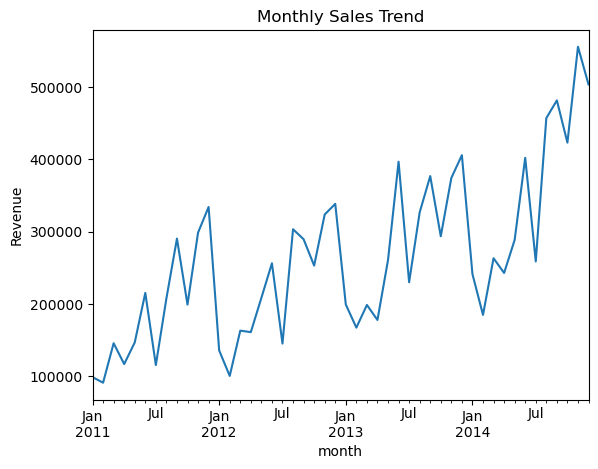

In [30]:
import matplotlib.pyplot as plt

monthly.plot(x="month", y="sales", kind="line", title="Monthly Sales Trend", legend=False)
plt.ylabel("Revenue")
plt.show()
